In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):#@save
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [3]:
#w=[2,-3.4]^T,b=4.2,c=噪声
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
#featrues为1000*2的张量，labels为1000*1的张量
print('features:',features[0],'\nlabels:',labels[0])

features: tensor([0.9138, 0.0959]) 
labels: tensor([5.6968])


tensor([[ 9.1380e-01,  9.5906e-02],
        [ 4.7800e-01,  2.6661e+00],
        [ 1.2028e+00,  4.2330e-01],
        ...,
        [ 7.3160e-01,  6.7522e-02],
        [-1.3066e+00, -1.6513e-01],
        [-7.0950e-04,  4.8290e-01]])


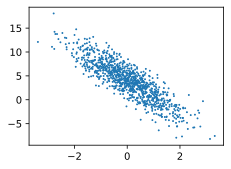

In [4]:
#绘制散点图
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)
print(features)

In [5]:
#小批次读取数据集
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    #样本随机，没有特定的顺序
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.0895,  1.2878],
        [-0.8659, -1.3061],
        [-1.2289,  0.4021],
        [-0.0416,  1.7845],
        [-0.0804,  0.4761],
        [-2.4068,  2.0776],
        [ 0.1153, -0.7488],
        [-0.6545, -0.2915],
        [ 1.2745,  1.5312],
        [ 0.0958,  0.0426]]) 
 tensor([[-0.0176],
        [ 6.9047],
        [ 0.3794],
        [-1.9469],
        [ 2.4374],
        [-7.6864],
        [ 6.9858],
        [ 3.8749],
        [ 1.5371],
        [ 4.2371]])


In [7]:
#初始化模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [8]:
#定义模型
def linreg(X,w,b):#@save
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [9]:
#定义损失函数
def squared_loss(y_hat,y):#@save
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [10]:
#定义优化算法
def sgd(params,lr,batch_size):#@save
    """小批次随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [11]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

In [12]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)#使用参数的梯度更新参数
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.050513
epoch 2, loss 0.000229
epoch 3, loss 0.000049


In [13]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([0.0008, 0.0004], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0009], grad_fn=<RsubBackward1>)


In [22]:
#默写
import torch
import random
#生成数据
def data_synthetic(w,b,num_example):
    """生成噪声"""
    X=torch.normal(0,1,(num_example,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape(-1,1)
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=data_synthetic(true_w,true_b,1000)
print(features[0],labels[0])
#小批次加载
def dataiter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=indices[i:min(i+batch_size,num_examples)]
        yield features[batch_indices],labels[batch_indices]
batch_size=10
for X,y in dataiter(batch_size,features,labels):
    print(X,y)
    break
#定义网络
def net(X,w,b):
    return torch.matmul(X,w)+b
#初始化参数
w=torch.normal(0,0.1,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
#定义损失函数
def loss(y_hat,y):
    return (y_hat-y)**2/2
#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()
#训练
num_epochs=3
lr=0.03
for epoch in range(num_epochs):
    for X,y in dataiter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {train_l.mean():f}')
#误差
print(f'w误差:{true_w-w.reshape(true_w.shape)}')
print(f'b误差:{true_b-b}')

tensor([-0.3864, -1.5640]) tensor([8.7465])
tensor([[ 1.2662,  0.6098],
        [-0.2070,  0.7505],
        [ 2.2390, -0.5980],
        [-0.2642, -0.1449],
        [ 1.3321,  1.2686],
        [ 1.0154, -0.3501],
        [ 0.7500,  0.0165],
        [ 1.5352, -0.1617],
        [ 0.8375,  0.8695],
        [ 1.2411, -1.5879]]) tensor([[ 4.6554],
        [ 1.2343],
        [10.6923],
        [ 4.1494],
        [ 2.5549],
        [ 7.4125],
        [ 5.6433],
        [ 7.8227],
        [ 2.9334],
        [12.0818]])
epoch 1, loss 0.049685
epoch 2, loss 0.000207
epoch 3, loss 0.000052
w误差:tensor([-0.0007, -0.0005], grad_fn=<SubBackward0>)
b误差:tensor([0.0004], grad_fn=<RsubBackward1>)
